In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal


In [57]:
def get_nearest_dates(df):
    # Sort the DataFrame by date in descending order
    df_sorted = df.sort_values('date', ascending = False)
    # Create an empty DataFrame to store the sliced results
    sliced_df = pd.DataFrame(columns = df_sorted.columns)

    # Iterate over each unique team in the DataFrame
    for team in df_sorted['team'].unique():
        # Get the records for the current team
        team_records = df_sorted[df_sorted['team'] == team]
        # Select the first 10 records if there are at least 10 records for the team
        if len(team_records) >= 10:
            sliced_df = pd.concat([sliced_df, team_records[:10]])
        # Select all records if there are fewer than 10 records for the team
        else:
            sliced_df = pd.concat([sliced_df, team_records])
    return sliced_df

# Call the function to get the sliced DataFrame
matches_sliced = get_nearest_dates(matches)
matches_sliced.head(60)
matches_sliced[matches_sliced['team'] == 'Sheffield United']

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
38,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1.0,3.0,Nott'ham Forest,...,Match Report,NaN,16.0,4.0,18.0,0.0,1,1,2024,Sheffield United
37,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Away,L,1.0,5.0,Newcastle Utd,...,Match Report,NaN,15.0,4.0,13.5,0.0,0,0,2024,Sheffield United
36,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,2.0,4.0,Manchester Utd,...,Match Report,NaN,10.0,4.0,17.8,1.0,0,0,2024,Sheffield United
35,2024-04-20,15:00,Premier League,Matchweek 34,Sat,Home,L,1.0,4.0,Burnley,...,Match Report,NaN,18.0,11.0,14.9,0.0,0,0,2024,Sheffield United
34,2024-04-13,15:00,Premier League,Matchweek 33,Sat,Away,L,0.0,2.0,Brentford,...,Match Report,NaN,8.0,2.0,15.1,0.0,0,0,2024,Sheffield United
33,2024-04-07,17:30,Premier League,Matchweek 32,Sun,Home,D,2.0,2.0,Chelsea,...,Match Report,NaN,11.0,5.0,15.2,0.0,0,0,2024,Sheffield United
32,2024-04-04,19:30,Premier League,Matchweek 31,Thu,Away,L,1.0,3.0,Liverpool,...,Match Report,NaN,5.0,3.0,13.6,1.0,0,0,2024,Sheffield United
31,2024-03-30,15:00,Premier League,Matchweek 30,Sat,Home,D,3.0,3.0,Fulham,...,Match Report,NaN,8.0,4.0,15.7,0.0,0,0,2024,Sheffield United
30,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Away,D,2.0,2.0,Bournemouth,...,Match Report,NaN,13.0,9.0,14.3,0.0,0,0,2024,Sheffield United
29,2024-03-04,20:00,Premier League,Matchweek 27,Mon,Home,L,0.0,6.0,Arsenal,...,Match Report,NaN,4.0,0.0,21.8,0.0,0,0,2024,Sheffield United


In [64]:
result_counts = matches_sliced.groupby('team')['result'].value_counts().unstack(fill_value=0)
#result_counts = result_counts.reset_index().copy()
result_counts

result,D,L,W
team,,,
Arsenal,1,1,8
Aston Villa,3,3,4
Bournemouth,2,3,5
Brentford,5,3,2
Brighton and Hove Albion,3,5,2
Burnley,5,3,2
Chelsea,4,1,5
Crystal Palace,3,3,4
Everton,2,4,4


In [68]:
team_avg = matches_sliced.groupby('team').mean(numeric_only = True)
# Create a new column 'average_value' and assign the average values for each team
#team_avg = team_avg.reset_index().copy()
team_avg = pd.merge(team_avg, result_counts, left_index=True, right_index=True)
team_avg = team_avg.reset_index().copy()
team_avg

,team,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,D,L,W
0,Arsenal,2.6,0.5,1.88,0.85,52.7,50771.6,NaN,17.9,6.0,15.60,0.3,1,1,8
1,Aston Villa,1.7,1.8,1.12,1.92,48.6,43103.4,NaN,10.2,3.7,15.82,0.2,3,3,4
2,Bournemouth,1.7,1.6,1.61,1.42,47.1,20682.9,NaN,16.1,5.4,17.05,0.7,2,3,5
3,Brentford,1.5,1.2,1.48,1.26,42.0,25936.2,NaN,12.3,4.4,16.11,0.4,5,3,2
4,Brighton and Hove Albion,0.5,1.7,1.01,1.42,57.3,30144.0,NaN,14.5,4.5,17.51,0.2,3,5,2
5,Burnley,1.4,1.6,1.54,1.97,52.1,34777.6,NaN,14.3,5.0,18.28,0.6,5,3,2
6,Chelsea,2.8,1.8,2.35,1.54,59.5,38312.5,NaN,17.5,6.8,17.96,0.6,4,1,5
7,Crystal Palace,1.8,1.3,1.35,1.25,41.5,31172.1,NaN,12.3,4.6,17.37,0.5,3,3,4
8,Everton,1.0,1.5,1.28,1.66,44.2,38315.4,NaN,13.2,3.8,17.72,0.3,2,4,4
9,Fulham,1.5,1.3,1.69,1.24,51.1,29126.0,NaN,16.1,5.4,15.34,0.1,3,4,3


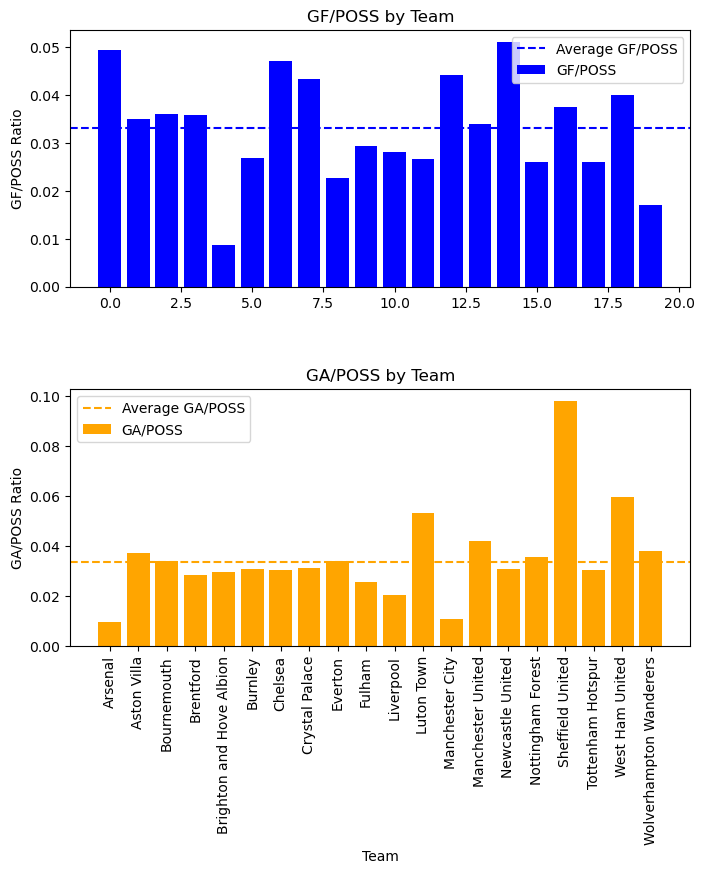

In [67]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Calculate the ratios for gf/poss and ga/poss
gf_poss_ratio = team_avg['gf'] / team_avg['poss']
ga_poss_ratio = team_avg['ga'] / team_avg['poss']

# Calculate the average ratios
avg_gf_poss_ratio = team_avg['gf'].mean() / team_avg['poss'].mean()
avg_ga_poss_ratio = team_avg['ga'].mean() / team_avg['poss'].mean()

# Set the x-axis positions for the bars
x = np.arange(len(team_avg))

# Plot the bars for gf/poss in the first subplot
ax1.bar(x, gf_poss_ratio, label='GF/POSS', color='blue')

# Plot the average line for gf/poss in the first subplot
ax1.axhline(avg_gf_poss_ratio, color='blue', linestyle='--', label='Average GF/POSS')

# Set labels and title for the first subplot
ax1.set_ylabel('GF/POSS Ratio')
ax1.set_title('GF/POSS by Team')

# Set the x-axis positions for the bars in the second subplot
x2 = np.arange(len(team_avg))

# Plot the bars for ga/poss in the second subplot
ax2.bar(x2, ga_poss_ratio, label='GA/POSS', color='orange')

# Plot the average line for ga/poss in the second subplot
ax2.axhline(avg_ga_poss_ratio, color='orange', linestyle='--', label='Average GA/POSS')

# Set labels and title for the second subplot
ax2.set_xlabel('Team')
ax2.set_ylabel('GA/POSS Ratio')
ax2.set_title('GA/POSS by Team')

# Set the x-axis tick positions and labels for both subplots
plt.xticks(np.arange(len(team_avg)), team_avg['team'], rotation=90)

# Add legends to both subplots
ax1.legend()
ax2.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()
